## Installation

1. Type `python3` into Terminal. If you see a few lines of text followed by `>>>`, then Python3 is already installed. Type Ctrl+d (or close the window) to exit and skip to step 3.
2. Go to https://www.python.org/downloads/ and click on "Download Python 3.6.4". Run the installer and follow the directions. Repeat step 1 to make sure it has successfully installed.
3. Install jupyter notebook, so that you can use this tutorial, by typing the following into Terminal:
    `pip3 install jupyter`
4. Start the jupyter notebook by typing in Terminal _in the same folder that you have this file_ 
    `jupyter notebook`
    This should open a tab in your web browser with a list of files in the folder. Click on this ipynb file to open it.
3. Install the tensorflow machine learning library by typing the following into Terminal:
    `pip3 install --upgrade tensorflow`
4. Install the keras machine learning library by typing the following into Terminal:
    `pip3 install keras`
5. Install the libraries we'll need to display the images: `pip3 install numpy matplotlib`
6. Test that the keras install worked: Again, type `python3` into the Terminal. When the `>>>` prompt comes up, type `from keras.models import Sequential`. If you don't get any error output, then it worked. Type Ctrl+d (or close the window) to exit.
    * If you get an error like `ModuleNotFoundError: No module named 'theano'` then you need to switch the backend to tensorflow. See the instructions at https://keras.io/backend/ or ask me for help.
    * If you get a warning like `/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6` you can ignore it. This is a known (trivial) issue with Tensorflow 1.4 for OSX. See https://github.com/tensorflow/tensorflow/issues/14182 if you'd like more details.


## The Code

First, we'll want to import the keras modules we'll be using for our neural network and the numpy and matplotlib modules that we'll be using for displaying our test images.

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
import numpy
from matplotlib.pyplot import imshow
# tell matplotlib to display images within this notebook
%matplotlib inline 

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## The First Model

Next, let's set up the structure of our model. We'll start with a really simple model, with just one convolutional layer that has just one filter. We are going to be using 9x9-pixel grayscale images, so we set the input shape accordingly. If we were using color images with red-green-blue channels, the last dimension (of input_shape) would be size three (one for each color) instead of one.

In [4]:
kernel_size = 3 #the number of terms 
image_size = 9

In [5]:
model0 = Sequential()
model0.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=1,
                  input_shape=(image_size, image_size, 1)))

Normally at this point, we would compile and train (aka fit) our model, but instead we're going to set the weights manually and then see the output we get on some test images.

First, let's take a look at what the randomly generated weights look like, to understand the format that we'll need to use to set the new weights. By changing the parameters of the model above and looking at how it affects the weight structure, we can understand what each weight is connected to (try it!).

In [6]:
weights = model0.get_weights()
weights 
#this is set up in the format where the entire array below is one layer
#the layer currently has a kernal size of 3, so each grouped y-value has 3 corresponding x-values 

[array([[[[-0.3462083 ]],
 
         [[-0.06585187]],
 
         [[ 0.3135904 ]]],
 
 
        [[[-0.38894275]],
 
         [[ 0.48490715]],
 
         [[ 0.3636008 ]]],
 
 
        [[[ 0.5594405 ]],
 
         [[ 0.0707854 ]],
 
         [[ 0.19883072]]]], dtype=float32), array([0.], dtype=float32)]

Now, we change the weights so that the filter will capture a certain pattern. We'll explore more about what this means below, but feel free to start generating some guesses.

In [7]:
layer_num = 0 #set to 0 because there is only 1 layer 
filter_num = 0 #set to 0 because there is only 1 filter
#set the weights of the first kernal to 1, and the last two to -1
#default Keras stride = 1
y = 0
for x in range(kernel_size):
    weights[layer_num][y][x][0][filter_num] = 1
for y in range(1,kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = -1
weights

[array([[[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]]], dtype=float32), array([0.], dtype=float32)]

And save those weights back into the model.

In [8]:
model0.set_weights(weights)

## Create Images

Now, let's create some 9x9 images that we will run through our model.

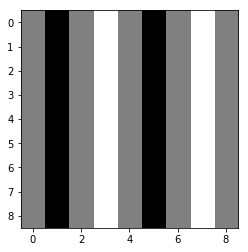

In [9]:
#each number here corresponds to a grayscale color
image0 = numpy.array([
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
], dtype=numpy.uint8)
imshow(image0, cmap='gray')

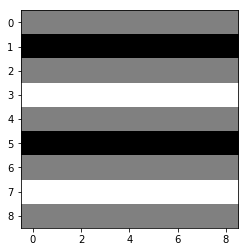

In [10]:
image1 = numpy.array([
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
], dtype=numpy.uint8)
imshow(image1, cmap='gray')

## Run Images Through Model

The images need to be in a slightly different format for Keras than they do for the imshow command. Right now, they are 9x9 arrays, and we need them to be 9x9x1 -- three dimensional instead of two.

In [11]:
images = []
for image in [image0]: # look at this one image at a time to see the pattern easier 
    images.append(numpy.resize(image, (image_size, image_size, 1)))

And now we give these images to our model and take a look at what the filter has found. 

In [12]:
model0.predict(numpy.array(images))

array([[[[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]],

        [[-256.],
         [-383.],
         [-511.],
         [-383.],
         [-256.],
         [-383.],
         [-511.]]]], dtype=float32)

## Questions -- Answer these before going on to the second model!
1. There are a lot of numbers in the output above. Where is each one coming from? Why are they in groups of seven?

###### Because the 3x3 kernal goes through each section of the 9x9 image, and multiplies those grayscale values by the weights defined, the prediction returns a 7x7 array. Because the weights are set so that the first row is '1' while the last 2 rows are '-1' the model seems to look for sections of light colors, followed by darker colors. Thus, when a particular number is greater than 0, that represents a 3x3 section of the image that has a row of light colors followed by 2 darker colors. 

### Question 2
In which image is the filter "finding" something, and why does this make sense, given the pattern of weights that was set?

##### As explained in the response to the previous question, because the filter is looking for a 3x3 section of a light colored row followed by two darker colored rows, the model does not seem to find anything for Image0. 

## The Second Model

Let's move to a slightly more complex model. Now, there are two convolutional layers, the first with two filters and the second with one filter. One other difference is that we're going to be taking strides so that we only examine each pixel once, instead of looking at overlapping groups. This makes it a little simpler to set the manual weights correctly for the pattern I chose.

In [13]:
model1 = Sequential() #Keras sequential model API
model1.add(Conv2D(filters=2, kernel_size=kernel_size, input_shape=(image_size, image_size, 1), strides=(3,3))) #strides to prevent overlap
model1.add(Conv2D(filters=1, kernel_size=kernel_size))

With a different model structure, we will have a different number of weights to fit.

In [14]:
weights = model1.get_weights()
weights 
#size of weights array = based on kernal size 
#first array includes weights for filter 1, weights for filter 2
#

[array([[[[-0.15816331, -0.4242195 ]],
 
         [[ 0.15062562,  0.06367734]],
 
         [[-0.42442483, -0.42404205]]],
 
 
        [[[-0.22347866, -0.3833078 ]],
 
         [[-0.39482662, -0.41895846]],
 
         [[-0.16151056, -0.02436706]]],
 
 
        [[[-0.24158405, -0.33968347]],
 
         [[-0.39524448, -0.4626074 ]],
 
         [[ 0.09279177,  0.325713  ]]]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[[[ 0.19147435],
          [-0.14828947]],
 
         [[ 0.3699647 ],
          [ 0.00091654]],
 
         [[ 0.07361099],
          [ 0.20370874]]],
 
 
        [[[-0.2183109 ],
          [ 0.18670705]],
 
         [[ 0.25429878],
          [ 0.05717179]],
 
         [[-0.32516518],
          [-0.3558999 ]]],
 
 
        [[[-0.401034  ],
          [ 0.45963982]],
 
         [[ 0.23103598],
          [ 0.06744811]],
 
         [[ 0.035557  ],
          [ 0.28745565]]]], dtype=float32),
 array([0.], dtype=float32)]

As before, we manually set the weights to match some specific patterns.

In [15]:
layer_num = 0
filter_num = 0 #first filter
for y in range(kernel_size):#kernel currently 3
    for x in range(kernel_size):
        if y == x: #right diagonal starting from top left corner to bottom right
            weights[layer_num][y][x][0][filter_num] = 1
        else: # positive for finding pattern, negative for not pattern
            weights[layer_num][y][x][0][filter_num] = -1

filter_num = 1 #second filter
for y in range(kernel_size):#kernal_size = 3
    for x in range(kernel_size):
        if kernel_size - 1 - y == x: #y=-x+2 for kernal=3; pattern = diagonal from bottom left to top right
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

Because the first layer has a stride of 3x3, then after the input runs through the first layer, the output is a 3x3.

In [16]:
layer_num = 2 #2nd Convolutional layer
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0
        if y == x: #same pattern for first filter of layer 1
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25 #-0.25 because it needs to find the pattern
        input_filter_num = 1 #set to second filter
        if kernel_size - 1 - y == x: #same pattern for second filter of layer 1
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25


Because the input to the second layer is 3x3, the output is just 1x1

In [17]:
weights

[array([[[[ 1., -1.]],
 
         [[-1., -1.]],
 
         [[-1.,  1.]]],
 
 
        [[[-1., -1.]],
 
         [[ 1.,  1.]],
 
         [[-1., -1.]]],
 
 
        [[[-1.,  1.]],
 
         [[-1., -1.]],
 
         [[ 1., -1.]]]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[[[ 1.  ],
          [-0.25]],
 
         [[-0.25],
          [-0.25]],
 
         [[-0.25],
          [ 1.  ]]],
 
 
        [[[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]]],
 
 
        [[[-0.25],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [-0.25]]]], dtype=float32),
 array([0.], dtype=float32)]

And save the weights back into the model.

In [18]:
model1.set_weights(weights)

Again, run our test images through the model to see what the filters output.

In [19]:
def predict_images(images):
    resized_images = []
    for image in images:#have to resize the image b/c Keras wants 9x9x1 array (3D) instead of 9x9
        resized_images.append(numpy.resize(image, (image_size, image_size, 1))) 
    return model1.predict(numpy.array(resized_images))

In [24]:
#should expect a 1x1 prediction
predict_images([image0,image1])

array([[[[-1150.]]],


       [[[-1150.]]]], dtype=float32)

## Exercise 1

Note above that neither image0 nor image1 gets a positive output. Create some images that do get positive ouputs from this model. The code below might help you get started.

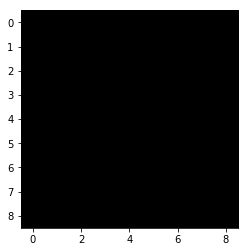

In [31]:
image_black = numpy.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=numpy.uint8)
imshow(image_black, cmap='gray', vmin=0, vmax=255)

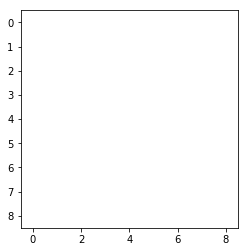

In [32]:
image_white = numpy.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
], dtype=numpy.uint8)
imshow(image_white, cmap='gray', vmin=0, vmax=255)

In [33]:
predict_images([image_black, image_white])

array([[[[    0.]]],


       [[[-2295.]]]], dtype=float32)

As expected, the black image would return a 0, while the white image would return a large negative. 

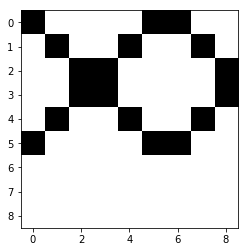

In [36]:
image_black_diagonals = numpy.array([
    [0, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 255, 0, 0, 255, 255, 255, 255, 0],
    [255, 255, 0, 0, 255, 255, 255, 255, 0],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [0, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
], dtype=numpy.uint8)
imshow(image_black_diagonals, cmap='gray', vmin=0, vmax=255)

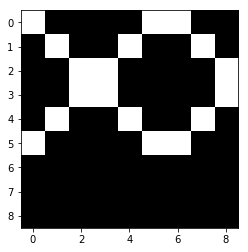

In [46]:
image_white_diagonals = numpy.array([
    [255, 0, 0, 0, 0, 255, 255, 0, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 0, 255, 255, 0, 0, 0, 0, 255],
    [0, 0, 255, 255, 0, 0, 0, 0, 255],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [255, 0, 0, 0, 0, 255, 255, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=numpy.uint8)
imshow(image_white_diagonals, cmap='gray', vmin=0, vmax=255)

In [47]:
predict_images([image_black_diagonals, image_white_diagonals])

array([[[[-2805.]]],


       [[[  510.]]]], dtype=float32)

## Exercise 2 (Optional)

Add additional filters to the model, and create images that get positive weights for different patterns of filters.